In [1]:
from sklearn import datasets  # For loading the MNIST dataset
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.preprocessing import StandardScaler  # To scale features for SVM
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report 

In [3]:
digits=datasets.load_digits()

In [4]:
x = digits.data
y = digits.target

In [15]:
x.shape, y.shape

((1797, 64), (1797,))

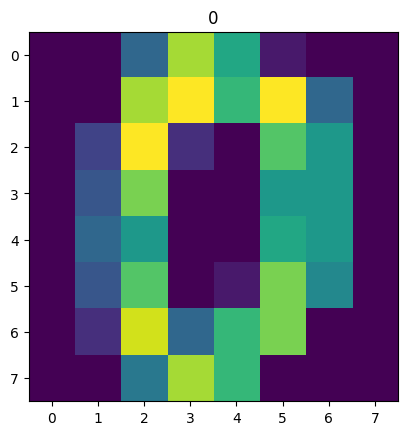

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x[0].reshape(8,8))
plt.title(y[0])
plt.show()

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
scaler = StandardScaler()  # Create a scaler object
x_train = scaler.fit_transform(x_train)  # Fit scaler to training data and transform it
x_test = scaler.transform(x_test)  # Transform test data using the same scaler

In [8]:
svm_model = SVC(kernel='linear', C=1)

In [9]:
svm_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
y_pred = svm_model.predict(x_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy by comparing predictions with true labels
print("Accuracy:", accuracy)  # Print accuracy score

# Print detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       1.00      1.00      1.00        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.95      0.95        43
           9       0.97      0.97      0.97        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# '''below is optional if required do '''

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [22]:
import seaborn as sns

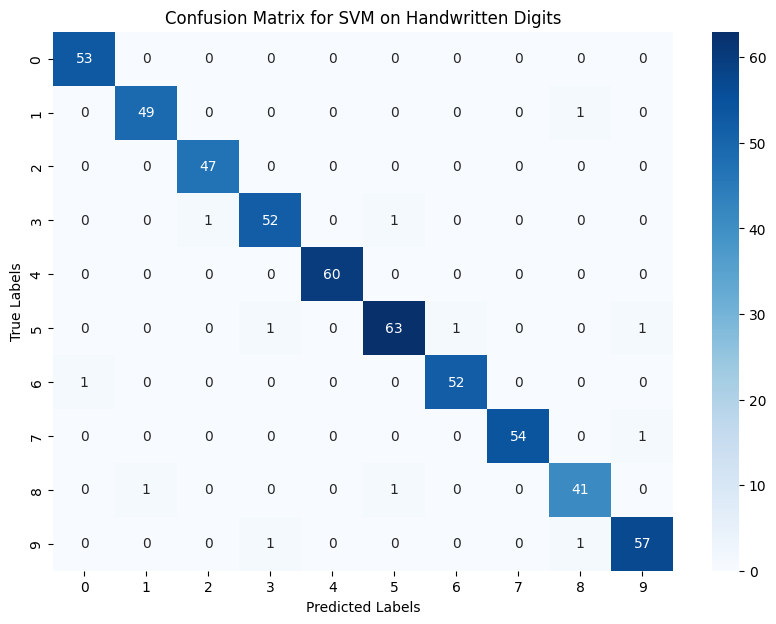

In [23]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVM on Handwritten Digits")
plt.show()